<a href="https://colab.research.google.com/github/krishnavikas-7/INFO-5731/blob/main/Term_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing required Libraries

In [6]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")
import nltk, re, string
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import seaborn as sn

#Reading the dataset

In [7]:
df = pd.read_csv('/content/sample_data/PPTL.csv')
df

,Concepts,Definition,CleanedTweet,Label1,Label2,Label3,Label4,Label5,Majority
0,Acute myocardial infarction,"Necrosis of the myocardium, as a result of int...",acute myocardial infarction is a blockage of b...,1,1,0,0,1,1
1,Acute myocardial infarction,"Necrosis of the myocardium, as a result of int...",acutemyocardialinfarction is a pathology chara...,1,1,0,0,0,0
2,Acute myocardial infarction,"Necrosis of the myocardium, as a result of int...",physical activity and anger or emotional upset...,1,1,1,0,1,1
3,Acute myocardial infarction,"Necrosis of the myocardium, as a result of int...",thrombus composition in sudden cardiacdeath fr...,1,0,0,0,0,0
4,Acute myocardial infarction,"Necrosis of the myocardium, as a result of int...",respiratoryinfection associated with increased...,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...
3428,Pleurisy,"\ninflammation of the pleura, with exudation i...",lupusfact lupus can attack your lungs potenti...,1,1,0,0,1,1
3429,Pleurisy,"\ninflammation of the pleura, with exudation i...",lupusfact lupus can attack your lungs potenti...,1,1,0,0,0,1
3430,Pleurisy,"\ninflammation of the pleura, with exudation i...",lupusfact lupus can attack your lungs potenti...,1,1,1,0,0,1
3431,Pleurisy,"\ninflammation of the pleura, with exudation i...",lupusfact lupus can attack your lungs potenti...,0,0,0,0,1,0


In [8]:
df.columns

Index(['Concepts', 'Definition', 'CleanedTweet', 'Label1', 'Label2', 'Label3',
       'Label4', 'Label5', 'Majority'],
      dtype='object')

In [9]:
df.head(5)

,Concepts,Definition,CleanedTweet,Label1,Label2,Label3,Label4,Label5,Majority
0,Acute myocardial infarction,"Necrosis of the myocardium, as a result of int...",acute myocardial infarction is a blockage of b...,1,1,0,0,1,1
1,Acute myocardial infarction,"Necrosis of the myocardium, as a result of int...",acutemyocardialinfarction is a pathology chara...,1,1,0,0,0,0
2,Acute myocardial infarction,"Necrosis of the myocardium, as a result of int...",physical activity and anger or emotional upset...,1,1,1,0,1,1
3,Acute myocardial infarction,"Necrosis of the myocardium, as a result of int...",thrombus composition in sudden cardiacdeath fr...,1,0,0,0,0,0
4,Acute myocardial infarction,"Necrosis of the myocardium, as a result of int...",respiratoryinfection associated with increased...,1,1,1,0,0,1


In [10]:
df.tail(5)

,Concepts,Definition,CleanedTweet,Label1,Label2,Label3,Label4,Label5,Majority
3428,Pleurisy,"\ninflammation of the pleura, with exudation i...",lupusfact lupus can attack your lungs potenti...,1,1,0,0,1,1
3429,Pleurisy,"\ninflammation of the pleura, with exudation i...",lupusfact lupus can attack your lungs potenti...,1,1,0,0,0,1
3430,Pleurisy,"\ninflammation of the pleura, with exudation i...",lupusfact lupus can attack your lungs potenti...,1,1,1,0,0,1
3431,Pleurisy,"\ninflammation of the pleura, with exudation i...",lupusfact lupus can attack your lungs potenti...,0,0,0,0,1,0
3432,Pleurisy,"\ninflammation of the pleura, with exudation i...",lupusfact lupus can attack your lungs potenti...,0,1,1,1,0,0


#Exploratory Data Analysis

In [11]:
df.describe()

,Label1,Label2,Label3,Label4,Label5,Majority
count,3433.00000,3433.000000,3433.000000,3433.000000,3433.000000,3433.000000
mean,0.60501,0.507719,0.510632,0.503641,0.493737,0.604428
std,0.48892,0.500013,0.499960,0.500060,0.500034,0.489045
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df.shape

(3433, 9)

In [13]:
df.Majority.unique()

array([1, 0])

In [14]:
df.isnull().sum()

Concepts        0
Definition      0
CleanedTweet    0
Label1          0
Label2          0
Label3          0
Label4          0
Label5          0
Majority        0
dtype: int64

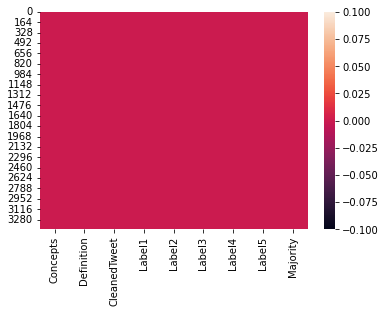

In [15]:
sns.heatmap(df.isnull())

In [16]:
df.info

<bound method DataFrame.info of                          Concepts  ... Majority
0     Acute myocardial infarction  ...        1
1     Acute myocardial infarction  ...        0
2     Acute myocardial infarction  ...        1
3     Acute myocardial infarction  ...        0
4     Acute myocardial infarction  ...        1
...                           ...  ...      ...
3428                     Pleurisy  ...        1
3429                     Pleurisy  ...        1
3430                     Pleurisy  ...        1
3431                     Pleurisy  ...        0
3432                     Pleurisy  ...        0

[3433 rows x 9 columns]>

Gives the count of number of unique values in the data

In [17]:
temp = df.groupby('Majority').count()['CleanedTweet'].reset_index().sort_values(by='CleanedTweet',ascending=False)
temp.style.background_gradient(cmap='Purples')

,Majority,CleanedTweet
1,1,2075
0,0,1358


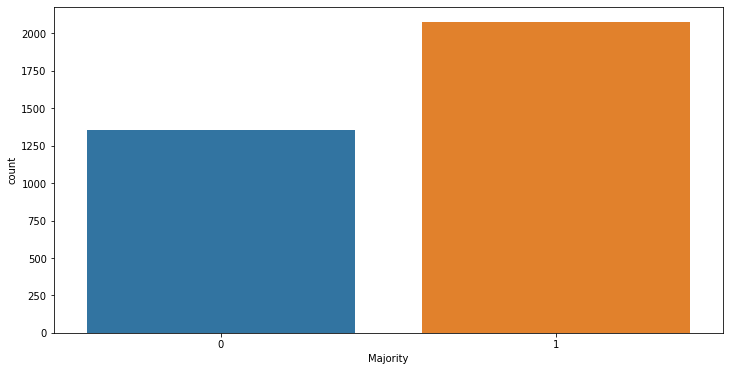

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(x='Majority',data=df)

Text(0.5, 1.0, 'Majority')

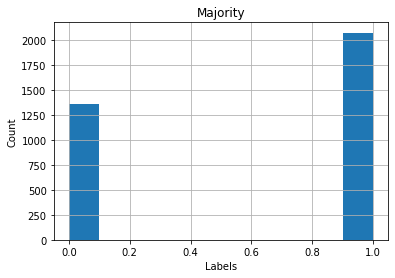

In [19]:
df['Majority'].hist()
plot.xlabel('Labels')
plot.ylabel('Count')
plot.title('Majority')

Most frequent concepts in the data

In [20]:
freq= df['Concepts'].value_counts()
display(freq)

Airway Obstruction              105
Paresis                         102
Petechiae                       101
Nasal irritation                101
Muscle injury                   101
Cold feet                       101
Dry scalp                       101
Sinus headache                  101
Phlebitis                       101
Odynophagia                     101
Otitis Media                    101
Oral pain                       101
Peritonitis                     101
Family stress                   101
Pleurisy                        101
Skin Pigmentation               101
Obesity                         101
Stress at work                  101
Pericarditis                    101
Speech Disorders                101
Opportunistic Infections        100
Nocturia                        100
Sore mouth                      100
Acute myocardial infarction     100
Potassium Deficiency            100
Oppositional                    100
Myocarditis                      99
Orchitis                    

#Correlation in the data

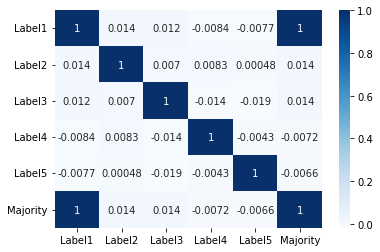

In [21]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='Blues',annot=True) 

Dark shades represents positive correlation while lighter shades represents negative correlation.

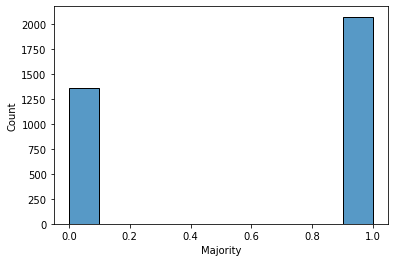

In [22]:
sns.histplot(df.Majority,bins=10)

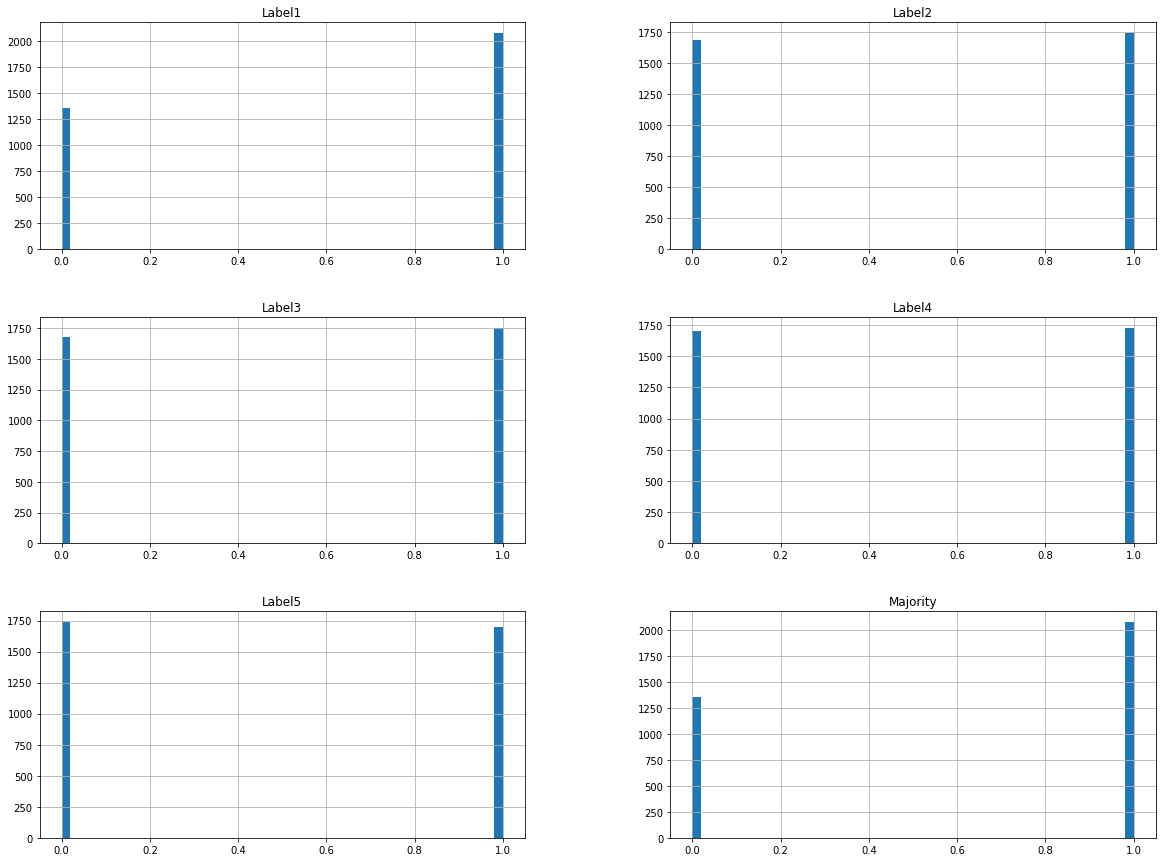

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [24]:
corr_matrix = df.corr()
corr_matrix["Majority"].sort_values(ascending=False)

Majority    1.000000
Label1      0.998782
Label2      0.013683
Label3      0.013631
Label5     -0.006559
Label4     -0.007215
Name: Majority, dtype: float64

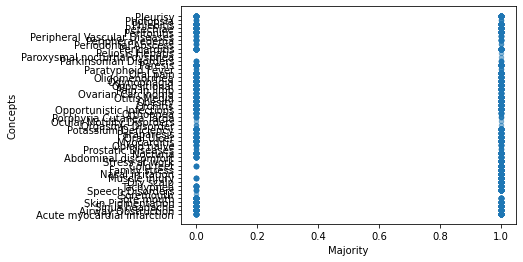

In [25]:
df.plot(kind="scatter", x="Majority", y="Concepts", alpha=0.5)

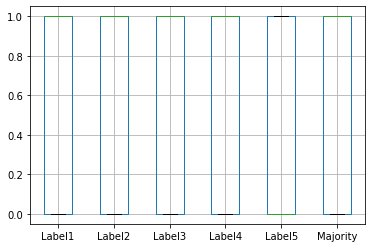

In [26]:
df.boxplot(column=['Label1', 'Label2', 'Label3', 'Label4','Label5','Majority'])

Boxplot for the concepts to the Majority voting

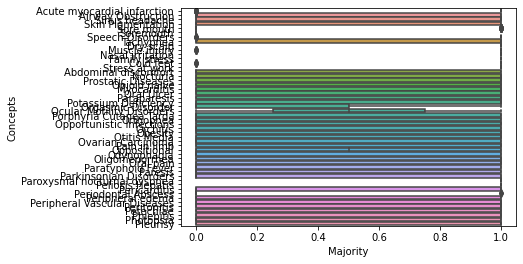

In [27]:
sns.boxplot(x='Majority',y='Concepts',data=df)

In [28]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [29]:
df["Majority"] = le.fit_transform(df["Majority"])
le.classes_

array([0, 1])

In [30]:
from scipy import stats
stats.mode(df.Majority)

ModeResult(mode=array([1]), count=array([2075]))

In [31]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [33]:
import nltk   #cleaning
df['CleanedTweet'] = df['CleanedTweet'].str.replace('[^\w\s]','')  #removal of punctuation
df['CleanedTweet'] = df['CleanedTweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))#lower case
from nltk.corpus import stopwords #removal of stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
df['CleanedTweet'] = df['CleanedTweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
words = []   #building document-term matrix
from nltk.tokenize import RegexpTokenizer
from gensim import corpora,models
tokenizer = RegexpTokenizer(r'\w+')
for x in pd.Series(df['CleanedTweet']):
  a = tokenizer.tokenize(x)
  words.append(a)
dictionary = corpora.Dictionary(words)
corpus = [dictionary.doc2bow(word) for word in words]

In [35]:
import gensim  #LDA model
model = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word = dictionary,passes = 20)

In [36]:
print(model.print_topics(num_topics = 10, num_words = 5))

[(0, '0.027*"stress" + 0.020*"news" + 0.014*"family" + 0.013*"sick" + 0.013*"familystress"'), (1, '0.014*"odynophagia" + 0.009*"oligomenorrhea" + 0.007*"lead" + 0.007*"menstrual" + 0.006*"obesity"'), (2, '0.015*"women" + 0.015*"oppositional" + 0.015*"disorder" + 0.013*"defiant" + 0.011*"new"'), (3, '0.022*"pericarditis" + 0.015*"phlebitis" + 0.014*"peritonitis" + 0.012*"paresis" + 0.010*"paininlimb"'), (4, '0.034*"infection" + 0.027*"otitismedia" + 0.027*"ear" + 0.019*"bacterial" + 0.017*"secondary"'), (5, '0.021*"heart" + 0.019*"myocarditis" + 0.015*"opportunisticinfections" + 0.014*"speechdisorders" + 0.010*"reactivatedviruses"'), (6, '0.027*"pleurisy" + 0.017*"lupus" + 0.015*"pain" + 0.014*"causing" + 0.014*"respiratoryfailure"'), (7, '0.030*"obesity" + 0.012*"feet" + 0.010*"coldfeet" + 0.009*"gerd" + 0.009*"cold"'), (8, '0.021*"scalp" + 0.021*"skin" + 0.019*"dry" + 0.016*"dryscalp" + 0.014*"skinpigmentation"'), (9, '0.022*"night" + 0.021*"nocturia" + 0.020*"getting" + 0.019*"much" 

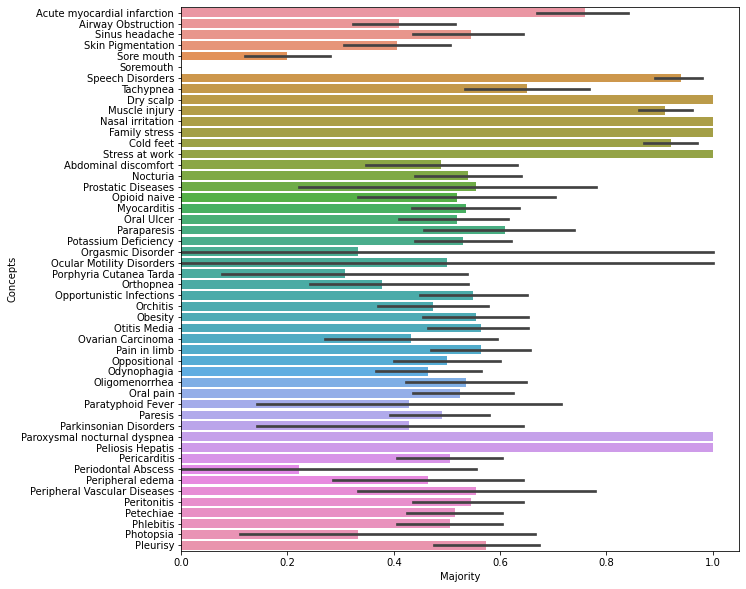

In [37]:
plt.figure(figsize=(10,10))
sns.barplot(df['Majority'],df['Concepts'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3433 entries, 0 to 3432
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Concepts      3433 non-null   object
 1   Definition    3433 non-null   object
 2   CleanedTweet  3433 non-null   object
 3   Label1        3433 non-null   int64 
 4   Label2        3433 non-null   int64 
 5   Label3        3433 non-null   int64 
 6   Label4        3433 non-null   int64 
 7   Label5        3433 non-null   int64 
 8   Majority      3433 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 241.5+ KB


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf= TfidfVectorizer(ngram_range=(1,2), max_features=1000)
tf_idf.fit(df['CleanedTweet'])
x_values =  tf_idf.transform(df['CleanedTweet'])
y_values = df['Majority']


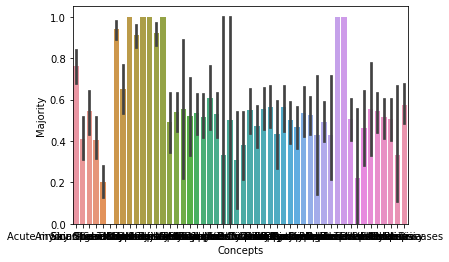

In [40]:
sns.barplot(df['Concepts'],df['Majority'])

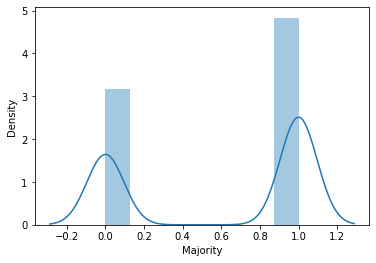

In [41]:
sns.distplot(df['Majority'])

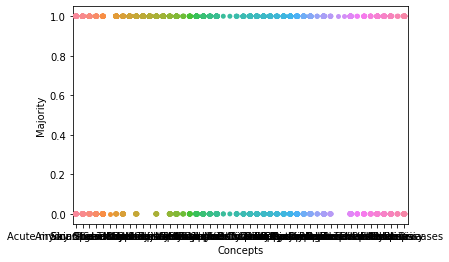

In [42]:
sns.stripplot(df['Concepts'],df['Majority'])

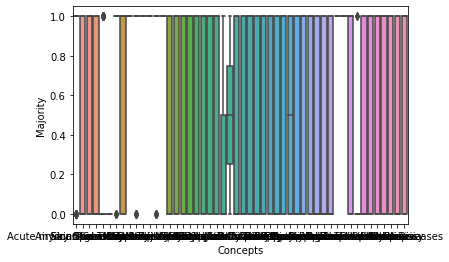

In [43]:
sns.boxplot(df['Concepts'],df['Majority'])

Calculating Kappa value to the each annotator to the Majority voting

In [44]:
cohen_kappa_score(df['Majority'],df['Label1'])


0.9987813851884167

In [45]:
cohen_kappa_score(df['Majority'],df['Label2'])

0.013422444015265267

In [46]:
cohen_kappa_score(df['Majority'],df['Label3'])

0.013387029636036218

In [47]:
cohen_kappa_score(df['Majority'],df['Label4'])

-0.007066203336561383

In [48]:
cohen_kappa_score(df['Majority'],df['Label5'])

-0.006397253967394212

#Data transformation

In [49]:
from sklearn import model_selection, preprocessing, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer='word')
tfidf_vect.fit(df['CleanedTweet'])
x_tfidf =  tfidf_vect.transform(df['CleanedTweet'])

In [50]:
vect_test = TfidfVectorizer(analyzer='word', vocabulary = tfidf_vect.vocabulary_)
vect_test.fit(df['CleanedTweet'])
xtest = vect_test.transform(df['CleanedTweet'])
test_y = df['Majority']

#Splitting the data into train and test

In [51]:
from sklearn import model_selection, preprocessing, naive_bayes, metrics, svm
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(x_tfidf, df['Majority'].values,test_size=0.2)

In [52]:
from sklearn import metrics
def get_metrics(predictions, test_data_y):
  accuracy = metrics.accuracy_score(predictions, test_data_y)
  precision = metrics.precision_score(predictions, test_data_y, pos_label='positive', average='micro')
  recall = metrics.recall_score(predictions, test_data_y, pos_label='positive', average='micro')
  f1 = metrics.f1_score(predictions, test_data_y, pos_label='positive', average='micro')
  return accuracy, precision, recall, f1

In [53]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
def cross_validation_score(modelName, x, y):
  scoring = 'accuracy'
  kfold = KFold(10, random_state = 7,shuffle=True)
  cross_val = cross_val_score(modelName, x, y, cv=kfold).mean()
  return cross_val

#Training and Evaluating the Models
Naive Bayes model-Validation metrics

In [54]:
naive_bayes_model = naive_bayes.MultinomialNB()
naive_bayes_model.fit(train_x, train_y)
naive_bayes_predictions_validation_data = naive_bayes_model.predict(valid_x)
accuracy, precision, recall, f1 = get_metrics(naive_bayes_predictions_validation_data, valid_y)
print("Accuracy is {0}".format(accuracy))

Accuracy is 0.6244541484716157


Cross validation score

In [55]:
nb_scores_mean = cross_validation_score(naive_bayes_model, valid_x, valid_y)
print('Navie Bayes Cross Validation Score is {0}'.format(nb_scores_mean))

Navie Bayes Cross Validation Score is 0.6287084398976982


Testing Metrics

In [56]:
naive_bayes_predictions_test_data = naive_bayes_model.predict(xtest)
accuracy, precision, recall, f1 = get_metrics(naive_bayes_predictions_test_data, test_y)
print("Accuracy is {0}".format(accuracy))

Accuracy is 0.8083309059131955


Cross Validation score Testing

In [57]:
nb_test_scores_mean = cross_validation_score(naive_bayes_model, xtest, test_y)
print('Navie Bayes Cross Validation Score is {0}'.format(nb_test_scores_mean))

Navie Bayes Cross Validation Score is 0.62133873482948


#Svm validation metrics

In [58]:
svm_model = svm.SVC()
svm_model.fit(train_x, train_y)
svm_predictions_validation_data = svm_model.predict(valid_x)
accuracy, precision, recall, f1 = get_metrics(svm_predictions_validation_data, valid_y)
print("Accuracy is {0}".format(accuracy))

Accuracy is 0.660844250363901


Cross Validation score

In [59]:
svm_scores_mean = cross_validation_score(svm_model, valid_x, valid_y)
print('SVM Cross Validation Score is {0}'.format(svm_scores_mean))

SVM Cross Validation Score is 0.6374254049445865


Testing Metrics

In [60]:
svm_predictions_test_data = svm_model.predict(xtest)
accuracy, precision, recall, f1 = get_metrics(svm_predictions_test_data, test_y)
print("Accuracy is {0}".format(accuracy))

Accuracy is 0.878823186717157


Cross Validation Score

In [61]:
svm_test_scores_mean = cross_validation_score(svm_model, xtest, test_y)
print('SVM Cross Validation Score is {0}'.format(svm_test_scores_mean))

SVM Cross Validation Score is 0.6393857210658349


Knn-Validation Metrics

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 15)
knn_model.fit(train_x, train_y)
knn_predictions_valid_data = knn_model.predict(valid_x)
accuracy, precision, recall, f1 = get_metrics(knn_predictions_valid_data, valid_y)
print("Accuracy is {0}".format(accuracy))

Accuracy is 0.6069868995633187


Cross Validation Score

In [63]:
knn_scores_mean = cross_validation_score(knn_model, valid_x, valid_y)
print('KNN Cross Validation Score is {0}'.format(knn_scores_mean))

KNN Cross Validation Score is 0.6229113384484228


Testing Metrics

In [64]:
knn_predictions_test_data = knn_model.predict(xtest)
accuracy, precision, recall, f1 = get_metrics(knn_predictions_test_data, test_y)
print("Accuracy is {0}".format(accuracy))

Accuracy is 0.6746286047189047


Cross validation score-Testing

In [65]:
knn_test_scores_mean = cross_validation_score(knn_model, xtest, test_y)
print('KNN Cross Validation Score is {0}'.format(knn_test_scores_mean))

KNN Cross Validation Score is 0.621320089497593


Decision Tree-Validation Metrics

In [66]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(train_x, train_y)
dt_predictions_valid_data = dt_model.predict(valid_x)
accuracy, precision, recall, f1 = get_metrics(dt_predictions_valid_data, valid_y)
print("Accuracy is {0}".format(accuracy))

Accuracy is 0.6302765647743813


Cross validation Score

In [67]:
dt_scores_mean = cross_validation_score(dt_model, valid_x, valid_y)
print('Decision Tree Cross Validation Score is {0}'.format(dt_scores_mean))

Decision Tree Cross Validation Score is 0.6010656436487639


Testing metrics

In [68]:
dt_predictions_test_data = dt_model.predict(xtest)
accuracy, precision, recall, f1 = get_metrics(dt_predictions_test_data, test_y)
print("Accuracy is {0}".format(accuracy))

Accuracy is 0.8811535100495194


Cross validation score-Testing

In [69]:
dt_test_scores_mean = cross_validation_score(dt_model, xtest, test_y)
print('Decision Tree Cross Validation Score is {0}'.format(dt_test_scores_mean))


Decision Tree Cross Validation Score is 0.623366838429724


Random Forest-Validation Metrics

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(train_x, train_y)
rf_predictions_valid_data = rf_model.predict(valid_x)
accuracy, precision, recall, f1 = get_metrics(rf_predictions_valid_data, valid_y)
print("Accuracy is {0}".format(accuracy))

Accuracy is 0.6419213973799127


Cross Validation score

In [71]:
rf_scores_mean = cross_validation_score(rf_model, valid_x, valid_y)
print('Random Forest Cross Validation Score is {0}'.format(rf_scores_mean))

Random Forest Cross Validation Score is 0.6460997442455243


Testing Metrics

In [72]:
rf_predictions_test_data = rf_model.predict(xtest)
accuracy, precision, recall, f1 = get_metrics(rf_predictions_test_data, test_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))

Accuracy is 0.8834838333818817
Precision is 0.8834838333818817
Recall is 0.8834838333818817
F1 is 0.8834838333818817


Cross validation score-Testing

In [73]:
rf_test_scores_mean = cross_validation_score(rf_model, xtest, test_y)
print('Random Forest Cross Validation Score is {0}'.format(rf_test_scores_mean))

Random Forest Cross Validation Score is 0.638521255678351


In [74]:
from sklearn.metrics import accuracy_score
naive_accuracy=accuracy_score(naive_bayes_predictions_test_data, test_y)
print(naive_accuracy)

0.8083309059131955


In [75]:
from sklearn.metrics import accuracy_score
svm_accuracy=accuracy_score(svm_predictions_test_data, test_y)
print(svm_accuracy)

0.878823186717157


In [76]:
from sklearn.metrics import accuracy_score
dt_accuracy=accuracy_score(dt_predictions_test_data, test_y)
print(dt_accuracy)

0.8811535100495194


In [77]:
from sklearn.metrics import accuracy_score
RF_accuracy=accuracy_score(rf_predictions_test_data, test_y)
print(RF_accuracy)

0.8834838333818817


In [78]:
from sklearn.metrics import accuracy_score
KNN_accuracy=accuracy_score(knn_predictions_test_data, test_y)
print(KNN_accuracy)

0.6746286047189047


Accuracies of the Model are as follows using the testing metrics

1.Naive Bayes  - 81.6%
2.SVM          - 87.5%
3.KNN          - 67.4%
4.Decision Tree- 87.9%
5.Random Forest- 88.8%

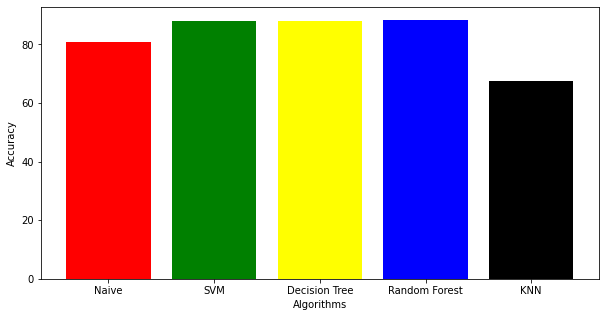

In [81]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,5))
algo=['Naive','SVM','Decision Tree','Random Forest','KNN']
acc=[]
acc.append(naive_accuracy*100)
acc.append(svm_accuracy*100)
acc.append(dt_accuracy*100)
acc.append(RF_accuracy*100)
acc.append(KNN_accuracy*100)
plt.bar(algo,acc,color=['red','green','yellow','blue','black'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.show()